<a href="https://colab.research.google.com/github/kushalsarkar404/assignment_krispcall/blob/main/task3_DataAnalysisAndVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Presented by: Kushal Sarkar*
#**Task 3: Data Analysis and Visualization**

The cleaned `sampledata.csv` dataset is imported as  `cleaneddataset.csv` to visualize using Python.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaneddataset.csv')

In [3]:
df.head()

,Unnamed: 0,country,year,cases,type,sex,age
0,18,Afghanistan,1997,0.0,sp,m,14
1,19,Afghanistan,1998,30.0,sp,m,14
2,20,Afghanistan,1999,8.0,sp,m,14
3,21,Afghanistan,2000,52.0,sp,m,14
4,22,Afghanistan,2001,129.0,sp,m,14




---


When I first had a glance at this dataset, I already asked myself *how is the distribution of Tuberculosis cases across different countries in the dataset?* To dive deeper into my curiosity and also to get valuable insights from the facts, I have decided to start the visualization from a geospatial map.


**GEOSPATIAL MAP**

<ipython-input-4-7e6d11ed8734>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


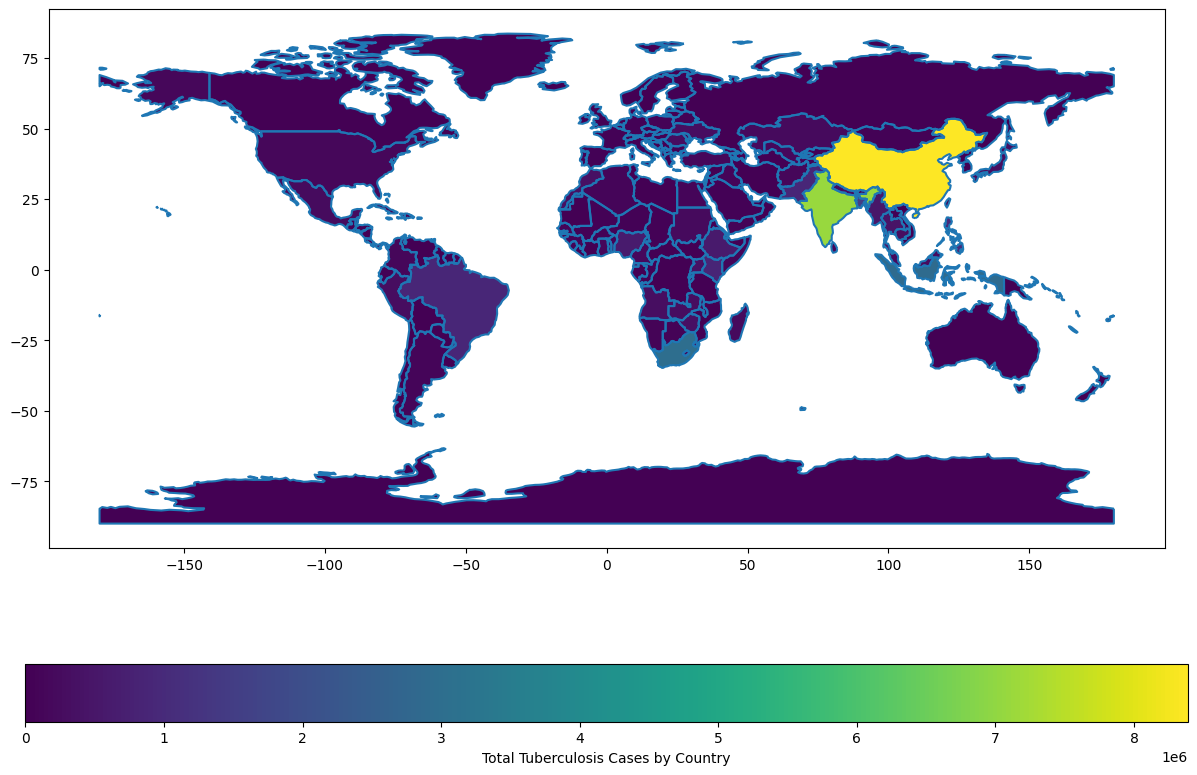

In [4]:
#using and importing Geopandas library for the maps:

import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt

#loading world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#aggregating cases by country
tb_agg = df.groupby('country')['cases'].sum().reset_index()

#merging dataset with the world map
world = world.merge(tb_agg, how='left', left_on='name', right_on='country')
world['cases']  = world['cases'].fillna(0)

#creating map:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cases', ax=ax, legend=True,
           legend_kwds={'label': "Total Tuberculosis Cases by Country",
                        'orientation': "horizontal"},
           cmap='viridis')
plt.show()

# **INSIGHTS FROM THE MAP**
Looking at the map above, it's evident that certain regions have more cases of tuberculosis. Notably, **China and India** stand out with the highest number of TB cases compared to other countries. It seems likely that the disease is particularly widespread in Southeast Asia. Additionally, there's a strong possibility that the prevalence of the disease is linked to people's living standards. In simpler terms, lower quality of life may increase the risk of contracting the disease.

**TIME SERIES LINE GRAPH**

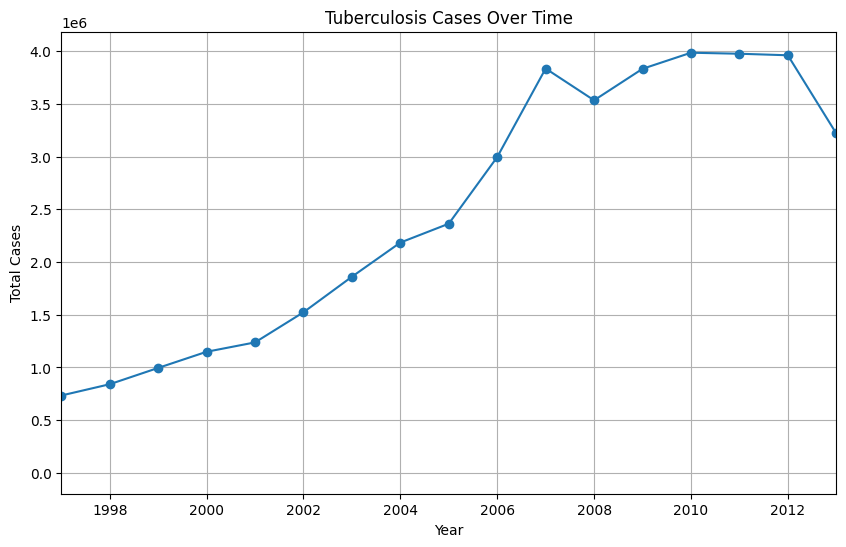

In [5]:
cases_by_year = df.groupby('year')['cases'].sum().reset_index()

# Ploting a time series plot
plt.figure(figsize=(10, 6))
plt.plot(cases_by_year['year'], cases_by_year['cases'], marker='o')
plt.title('Tuberculosis Cases Over Time')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.xlim(1997, max(cases_by_year['year']))
plt.show()

# **ANALYSIS OF THE TIME SERIES GRAPH**
I created a line graph to examine the Tuberculosis cases trend starting from `1997`. The chart clearly indicates that the number of cases remained constant until `2007`. There's a sudden drop in `2008`, followed by a rise. By `2010`, the line levels off, signaling a plateau, and then starts declining from `2012` onwards.

In summary, the analysis suggests a period of stability until `2007`, followed by a fluctuating pattern in the subsequent years. The plateau in `2010` and the subsequent decline from `2012` onward indicate potential improvements in Tuberculosis control or healthcare interventions during that period.

**PIE CHART**

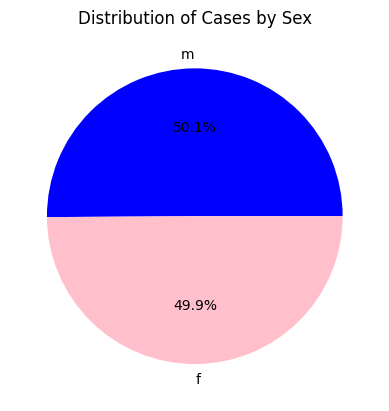

In [6]:
# Pie chart for distribution of cases based on 'sex'
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Distribution of Cases by Sex')
plt.show()

# **GENDER EXPLORATION**
I chose for a straightforward chart to illustrate the gender distribution within the dataset. The dataset is well-balanced, and upon examination, it's evident that the number of `males` with TB is slightly higher than the number of `females` affected by the disease.

In [7]:
df = df.dropna(subset=['type'])

In [8]:
# Checking for NaN values in 'type' column
nan_rows = df[df['type'].isna()]
print("Rows with NaN in 'type' column:")
print(nan_rows)

# Displaying unique values in 'type' column
unique_types = df['type'].unique()
print("Unique types:", unique_types)


Rows with NaN in 'type' column:
Empty DataFrame
Columns: [Unnamed: 0, country, year, cases, type, sex, age]
Index: []
Unique types: ['sp' 'sn' 'ep' 'rel']


**BAR PLOT**

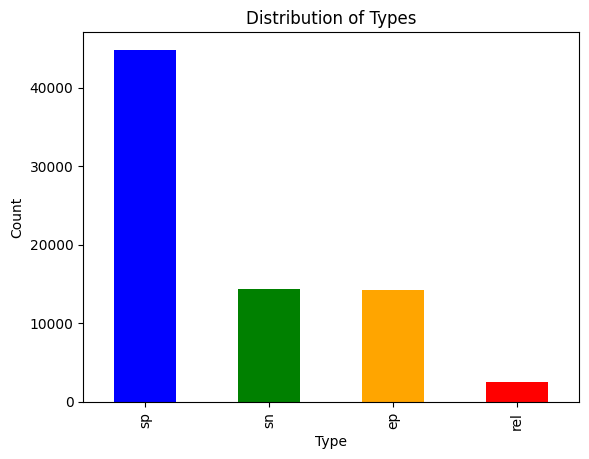

In [9]:
# Bar plot for "Type"
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# **ANALYSING THE TYPES**
Looking at the chart above, it's evident that among the four types of TB—`SP, SN, EP, and REL`—the `SP` type is the most prevalent. In comparison, the number of `SN` and `EP` cases is nearly equal, with `REL` cases being the least frequent.

In [10]:
df.tail()

,Unnamed: 0,country,year,cases,type,sex,age
76041,7070,Viet Nam,2013,3110.0,rel,f,65
76042,7104,Wallis and Futuna Islands,2013,2.0,rel,f,65
76043,7172,Yemen,2013,360.0,rel,f,65
76044,7206,Zambia,2013,669.0,rel,f,65
76045,7240,Zimbabwe,2013,725.0,rel,f,65


**LINE GRAPH**

<ipython-input-11-fd48af3f42c9>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='cases', hue='type', data=df, marker='o', hue_order=['sp', 'sn', 'rel', 'ep'], ci=None)


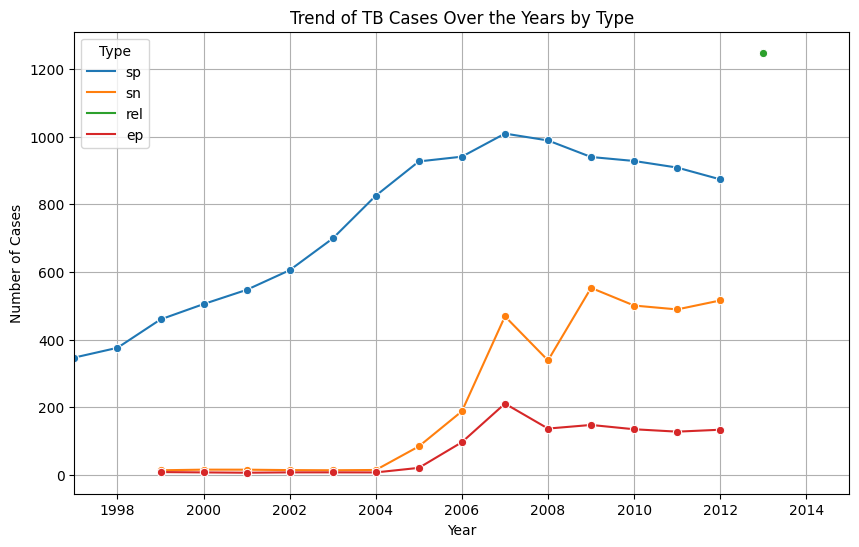

In [11]:
import seaborn as sns
# Ensuring the 'year' column is numeric
df['year'] = pd.to_numeric(df['year'])

# Using seaborn to create a cleaner line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='cases', hue='type', data=df, marker='o', hue_order=['sp', 'sn', 'rel', 'ep'], ci=None)

# Customizing the plot
plt.title('Trend of TB Cases Over the Years by Type')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Type', loc='upper left')
plt.grid(True)
plt.xlim(1997, max(df['year']+2))  # Set x-axis limits from 1997 to the maximum year in the dataset
plt.show()

# **Analysis of Tuberculosis (TB) Cases Types Trends Over the Years**

The line graphs presented above illustrate distinct trends in various types of Tuberculosis (TB) cases over the years. A comprehensive analysis reveals significant patterns in the prevalence of `SP, EP, SN, and REL` types.

**1. SP Type:**

The SP type exhibits a consistent upward trajectory from `1997 to 2007`. Notably, it has consistently maintained the highest number of reported cases throughout this period. However, it is essential to note that there is a subsequent fluctuation in later years, indicating a potential shift in the dynamics of `SP` type TB cases.

**2. EP & SN TYPES**

In contrast, both `EP and SN` types initially experienced a relatively lower occurrence compared to SP. From `1999 to 2004`, these types maintained a stable number of cases. Nevertheless, a noteworthy shift occurred after `2004`, marked by an exponential increase in reported cases for both `EP and SN` types. Although `SN` consistently presented a higher number of cases than `EP`, both types displayed fluctuations in later years.

**3. REL TYPE**

Surprisingly, the `REL` type was observed to prevail only in the year `2013`. This could suggest that the identification or recognition of this specific type may have been limited or delayed, potentially leading to its discovery and reporting in that particular year.


**BAR PLOT**

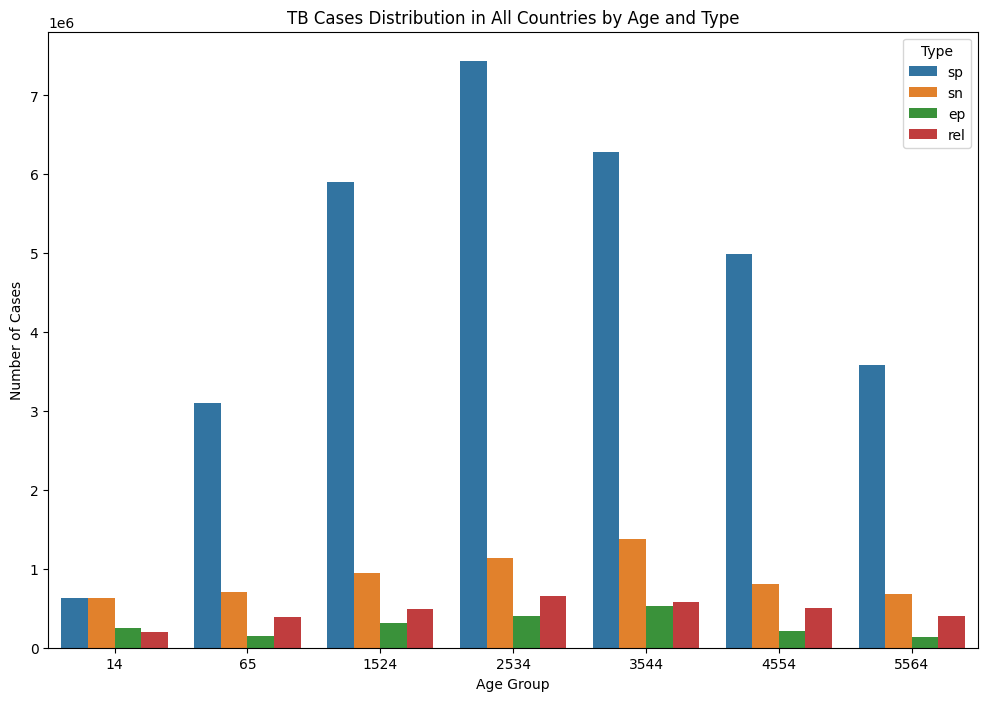

In [22]:
# Group the data by 'age' and 'type', and sum the 'cases'
grouped_data = df.groupby(['age', 'type'])['cases'].sum().reset_index()

# Specify the order of 'type' categories
type_order = ['sp', 'sn', 'ep', 'rel']

# Using seaborn to create a bar plot with specified order
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='cases', hue='type', data=grouped_data, order=grouped_data['age'].unique(), hue_order=type_order)

# Customizing the plot
plt.title('TB Cases Distribution in All Countries by Age and Type')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Type', loc='upper right')

plt.show()

# **NUMBER OF CASES IN DIFFERENT AGE GROUPS**
The picture above shows us how different kinds of TB affect people of different ages. The most common type, called SP, is seen a lot in all age groups, especially in people aged `25-34`. But the number of cases is the lowest for people aged `0-14`. This big difference in the number of cases among age groups is important to notice.

When we look at the patterns in different age groups, we can see that as people get older, the number of TB cases generally goes up. It reaches the highest point for people aged `25-34` and then starts to go down slowly. This means that older people might be more likely to get TB.

Looking at specific types of TB, SN cases gradually increase as people get older, showing a constant upward trend. On the other hand, the way EP and REL cases are distributed is interesting. In the age group `0-14`, there are more EP cases than REL cases, but this changes in later age groups.

In summary, the chart highlights that SP type TB is common across all age groups, especially in the `25-34` age group. It also shows us that TB cases tend to go up with age and then start to go down. Additionally, it points out different trends for SN, EP, and REL cases in various age groups.






